# 岭回归

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axisartist.axislines import SubplotZero

%matplotlib inline
plt.rcParams['font.family'] = ['SimHei'] # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False


In [14]:
# mat = np.mat([[1,2,3],[4,5,6],[7,8,9]])
mat = np.mat([[1,3,2], [5,7,4], [9,1,6]])
mat.T

matrix([[1, 5, 9],
        [3, 7, 1],
        [2, 4, 6]])

## 散点图

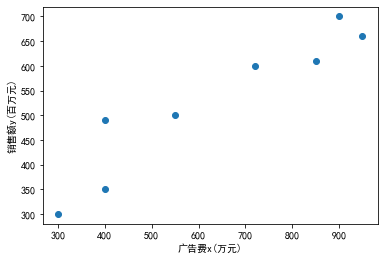

In [3]:
fig, ax = plt.subplots(figsize=(6, 4))
x = [300,400,400,550,720,850,900,950]
y = [300,350,490,500,600,610,700,660]
ax.set_xlabel('广告费x(万元)')
ax.set_ylabel('销售额y(百万元)')
ax.scatter(x, y)

## 矩阵

In [9]:
yMat = np.mat(y).T
ymean = np.mean(yMat, axis=0)
yMat = yMat - ymean
yMat.shape

def regularize(xMat):
    inMat = xMat.copy()
    inMean = np.mean(inMat, axis=0)
    inVar = np.var(inMat, 0)
    inMat = (inMat - inMean) / inVar
    return inMat
xMat = np.mat(x).T
xMat = regularize(xMat)
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [8]:
class Regression:
    def __init__(self, x, y):
        self.n = len(x)
        self.x = np.array(x)
        self.y = np.array(y)
    def getBeta(self):
        self.beta = (np.sum(self.x * self.y) * self.n - np.sum(self.x) * np.sum(self.y)) / (self.n * np.sum(self.x ** 2) - np.sum(self.x) ** 2)
        return self.beta
    def getAlpha(self):
        self.alpha = np.average(self.y) - self.beta * np.average(self.x)
        return self.alpha


In [69]:
df = pd.DataFrame({'广告费':[300,400,400,550,720,850,900,950], '推广':[1,1.1,1.2,1.3,1.4,1.5,1.6,1.7], '销售额':[300,350,490,500,600,610,700,660]})
xArr = df.loc[:,['广告费', '推广']].to_numpy()
yArr = df.loc[:,['销售额']]
xMat = np.mat(xArr)
yMat = np.mat(yArr)
xtx = xMat.T * xMat
xMat

matrix([[300. ,   1. ],
        [400. ,   1.1],
        [400. ,   1.2],
        [550. ,   1.3],
        [720. ,   1.4],
        [850. ,   1.5],
        [900. ,   1.6],
        [950. ,   1.7]])

In [67]:
def mat():
    x = np.array([[1,2,3],[4,5,6]])
    xMat = np.mat(x)
    return xMat * xMat.T
mat()

matrix([[14, 32],
        [32, 77]])

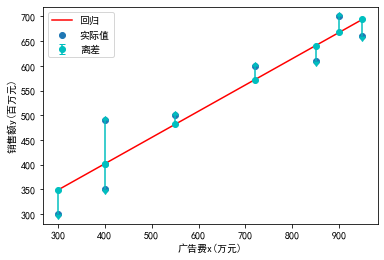

In [55]:
fig, ax = plt.subplots(figsize=(6, 4))
x = np.asarray([300,400,400,550,720,850,900,950], np.float32)
y = [300,350,490,500,600,610,700,660]
ax.set_xlabel('广告费x(万元)')
ax.set_ylabel('销售额y(百万元)')
ax.scatter(x, y, label="实际值")
yhat = 189.753472 + 0.530961 * x
ax.plot(x, yhat, color='red', label="回归")
yerr = y - yhat
uplims = np.empty(len(x))
lolims = np.empty(len(x))
for i in range(len(x)):
    if yerr[i] > 0:
        uplims[i] = False
        lolims[i] = True
    else:
        uplims[i] = True
        lolims[i] = False
        yerr[i] = -yerr[i]
ax.errorbar(x, yhat, yerr=yerr, uplims=uplims, lolims=lolims, label="离差", fmt='co')
ax.legend()